Programa simulando las ecuaciones de Lorentz.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from mpl_toolkits import mplot3d


Implementamos el método de Runge-Kutta orden 4 para resolver el sistema de orden 3 de ecuaciones diferenciales no lineales acopladas.
Definimos el métode de Runge metiendole la matriz del sistema, los valores inicales, el tiempo final de iteraciones y los argumentos adicionales para la función.

In [2]:
def metodo_Rk(f,t0,X0,t_final,h):
    n = round((t_final-t0)/h)
    t=np.linspace(t0,t_final,n+1)
    m = len(X0)
    x = np.zeros((n+1, m))
    x[0] = X0
    for i in range(n):
        k1 = h * f(x[i])
        k2 = h * f(x[i] + k1/2)
        k3 = h * f(x[i] + k2/2)
        k4 = h * f(x[i] + k3)
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / float(6)
    return t, x

Definimos las ecuaciones de Lorentz: donde $\sigma$, $\rho$ y $\beta$ son parametros que meteremos manualmente.
Llamamos X al vector de estado x,y,z
y me retorna la derivada de las componentes del vector metiendole los diferentes parámetros.

In [3]:
def sistema_lorentz(x):
    sigma=30
    beta=8/3
    rho=50
    dx_dt=sigma*(x[1]-x[0])
    dy_dt=x[0]*(rho-x[2])-x[1]
    dz_dt=x[0]*x[1]-beta*x[2]
    return np.array([dx_dt,dy_dt,dz_dt])

Empezamos a definir los paramentros que necesitaremos para implementar las funciones.

In [4]:
X0=np.array([0.,-1.,0.])
t0=0
t_final=200
h=0.001
t,x=metodo_Rk(sistema_lorentz,t0,X0,t_final,h)


Llamamos y ploteamos el sistema definido:

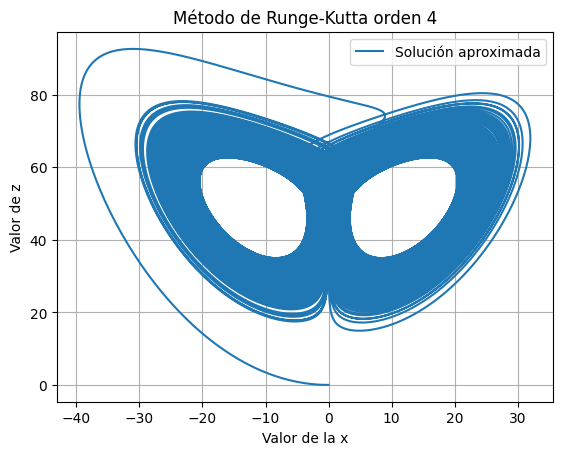

In [5]:
plt.plot(x[:,0],x[:,2], label='Solución aproximada')#Mariposa

plt.xlabel('Valor de la x')
plt.ylabel('Valor de z')
plt.title('Método de Runge-Kutta orden 4')
plt.legend()
plt.grid(True)
plt.show()

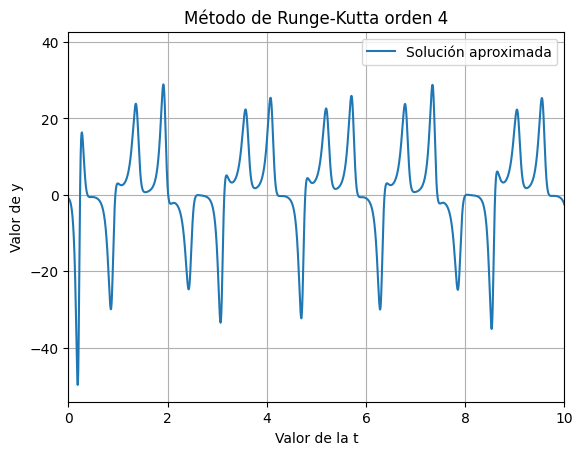

In [6]:
plt.plot(t,x[:,1] , label='Solución aproximada')

plt.xlabel('Valor de la t')
plt.ylabel('Valor de y')
plt.title('Método de Runge-Kutta orden 4')
plt.xlim(0,10)
plt.legend()
plt.grid(True)
plt.show()

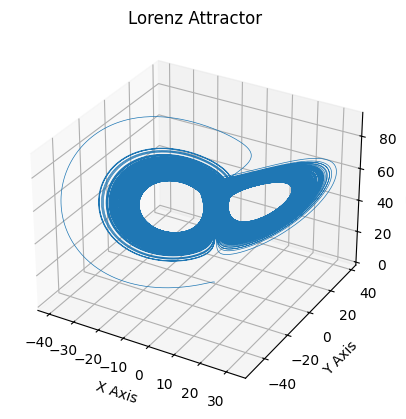

In [7]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*x.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()